In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=1599a30a29aefc794e8d42a0bcd10577bdf07db9f351437e5322aa34dc796bf2
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [ ]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np
import h5py

%load_ext tensorboard

data loading takes at most 17s

In [ ]:
dm = DataManager(transformer=False, micro=True)
X_trainhalflife, X_trainpromoter, y_train, _, X_traintf, X_trainmicro               = dm.get_train(True, False, True)
X_validationhalflife, X_validationpromoter, y_validation, _, X_validtf, X_valmicro  = dm.get_validation(True, False, True)
X_testhalflife, X_testpromoter, y_test, _, X_testtf, X_testmicro                    = dm.get_test(True, False, True)

In [ ]:
_

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
print(X_trainhalflife.shape, X_trainpromoter.shape, y_train.shape, X_traintf.shape, X_trainmicro.shape)

(15935, 8) (15935, 20000, 4) (15935,) (0,) (15935, 2064)


In [ ]:
print(X_validationhalflife.shape, X_validationpromoter.shape, y_validation.shape, X_validtf.shape, X_valmicro.shape)

(1000, 8) (1000, 20000, 4) (1000,) (0,) (1000, 2064)


In [ ]:
print(X_testhalflife.shape, X_testpromoter.shape, y_test.shape, X_testtf.shape, X_testmicro.shape)

(1000, 8) (1000, 20000, 4) (1000,) (0,) (1000, 2064)


In [ ]:
X_trainhalflife[0]

array([ 0.33863573, -0.7860334 , -0.25432516,  0.86491074,  0.37036529,
       -0.94255066, -0.55663622, -0.86531572])

Preprocessing-> Padding

In [ ]:
leftpos  = 3_000          #3_000 
rightpos = 13_500         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [ ]:
X_trainhalflife      = np.array(X_trainhalflife)
X_validationhalflife = np.array(X_validationhalflife)
X_testhalflife       = np.array(X_testhalflife)       
y_train              = np.array(y_train)
y_validation         = np.array(y_validation)
y_test               = np.array(y_test)


In [ ]:
X_trainpromoter_p      = np.array(X_trainpromoter)
X_validationpromoter_p = np.array(X_validationpromoter)
X_testpromoter_p       = np.array(X_testpromoter)

In [ ]:
print(X_trainpromoter_p.shape)
print(X_validationpromoter_p.shape)
print(X_testpromoter_p.shape)

print(X_trainpromoter_p[0])

(15935, 20000, 4)
(1000, 20000, 4)
(1000, 20000, 4)
[[False False  True False]
 [ True False False False]
 [False False False  True]
 ...
 [False False False  True]
 [False False False  True]
 [ True False False False]]


In [ ]:
print(type(X_trainpromoter_p))
print(type(X_validationpromoter_p))
print(type(X_testpromoter_p))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# print(X_trainpromoter_p)
# print(X_validationpromoter_p)
# print(X_testpromoter_p)

In [ ]:
X_trainpromoter_p         = X_trainpromoter_p[:, leftpos:rightpos, :]
X_validationpromoter_p = X_validationpromoter_p[:, leftpos:rightpos, :]
X_testpromoter_p          = X_testpromoter_p[:, leftpos:rightpos, :]

In [ ]:
print(X_trainpromoter_p.shape)
print(X_validationpromoter_p.shape)
print(X_testpromoter_p.shape)

(15935, 10500, 4)
(1000, 10500, 4)
(1000, 10500, 4)


Train Xpresso with the joint data with Micro

model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10500, 128)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 350, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 350, 32)      36896       max_pooling1d[0][0]              
__________________________________________________________________________________

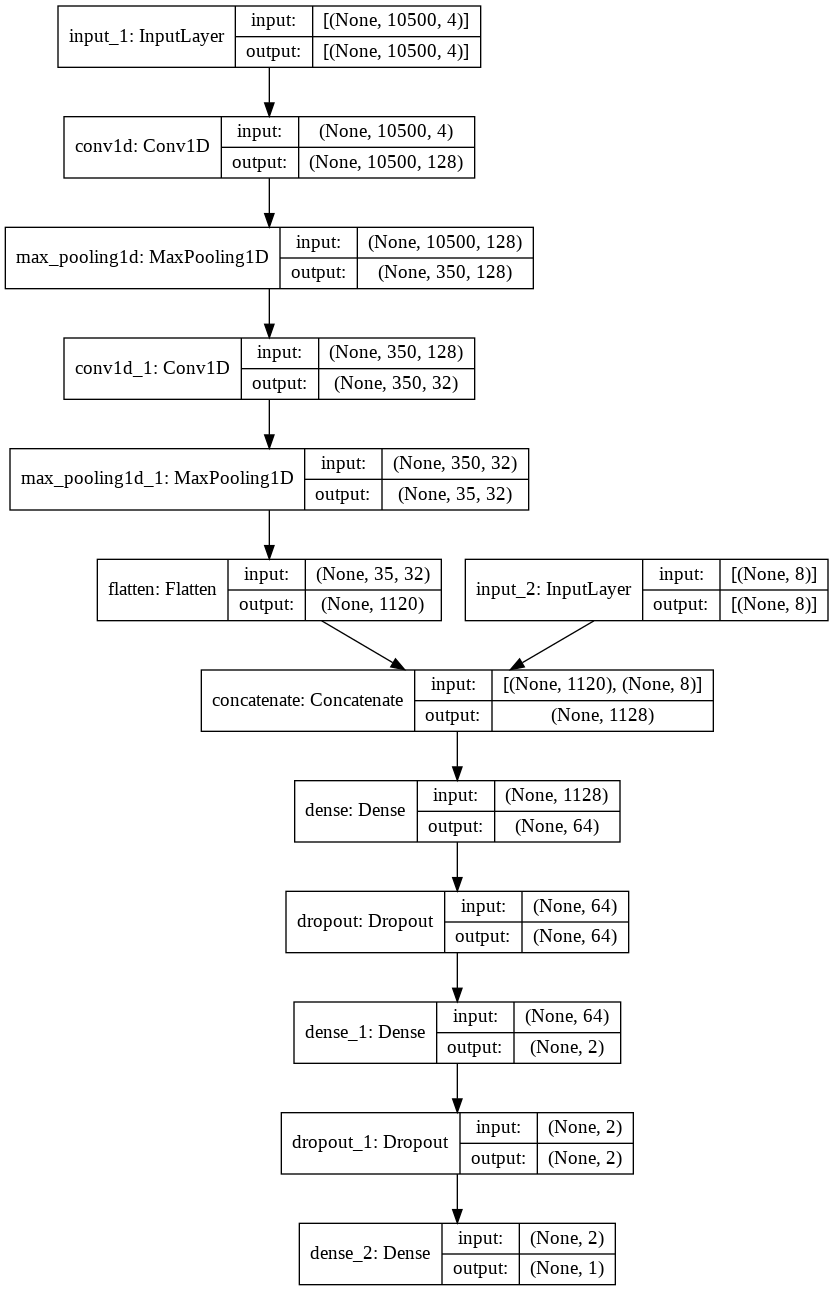


Parameters:
{'checkpoint_dir': 'micro1X_1/', 'model_type': 'Xpresso', 'n_epochs': 100, 'batch_size': 128, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': 'logs/Xpresso_0-006', 'patience': 30, 'opt': 'SGD', 'loss': 'mse', 'n_components_LSA': 100, 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fce55af39d0>}

Epoch 1/100
125/125 [==============================] - 48s 130ms/step - loss: 0.9685 - val_loss: 0.8958

Epoch 00001: val_loss improved from inf to 0.89583, saving model to Saved_Models/checkpoint/micro1X_1/bestmodel_CNN1D_Xpresso
INFO:tensorflow:Assets written to: Saved_Models/checkpoint/micro1X_1/bestmodel_CNN1D_Xpresso/assets
Epoch 2/100
125/125 [==============================] - 16s 127ms/step - loss: 0.8922 - val_loss: 0.8413

Epoch 00002: val_loss improved from 0.89583 to 0.84131, saving model to Saved_Models/checkpo

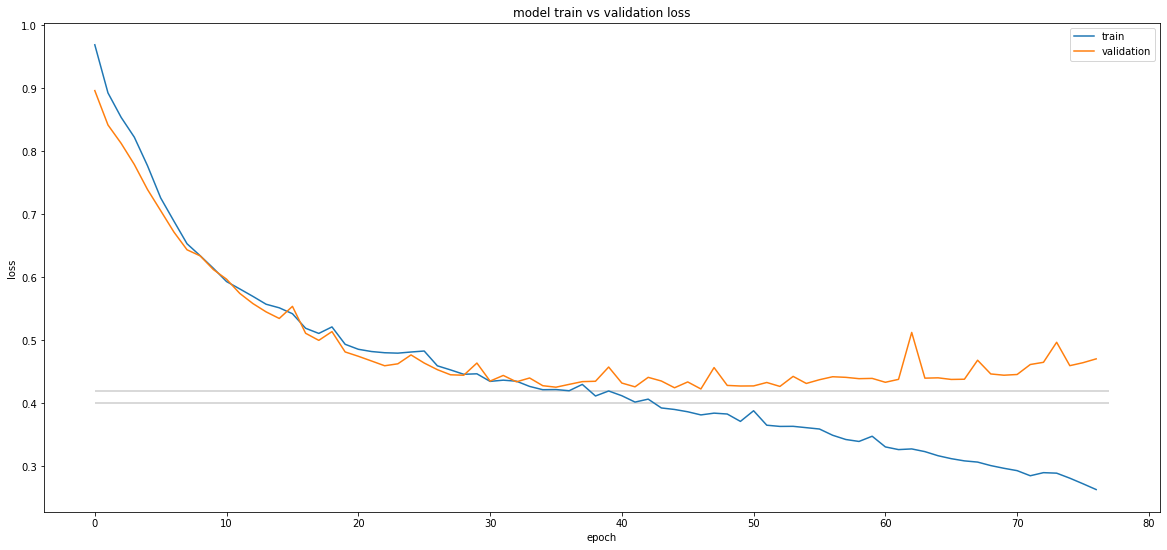

In [ ]:
# # Clear any logs from previous runs
#!rm -rf ./logs/micro1X-006/
# maxlen=18850
model_type="Xpresso"
checkpoint_dir="micro1X_1/"
logdir = None #f"{model_type}_0-006"
net = projCNN1D(shuffle=True, checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=100, batch_size=128, learning_rate=5e-4, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir)
net.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation)

In [ ]:
net.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.545


0.5449390076900358

In [ ]:
net.evaluate_best([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.567


0.5674923238356843

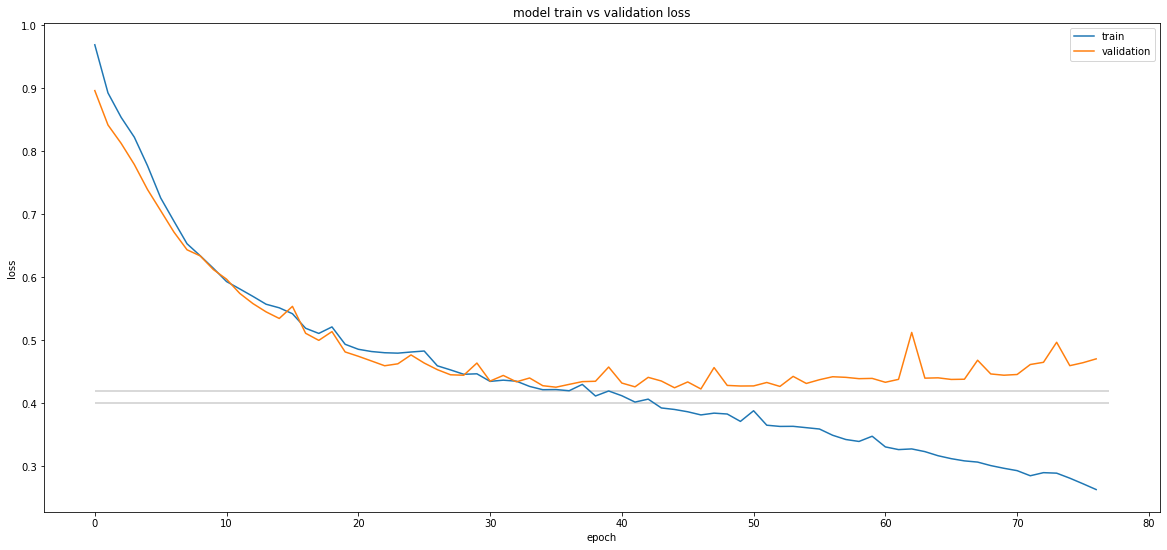

In [ ]:
net.plot_train()

No handles with labels found to put in legend.


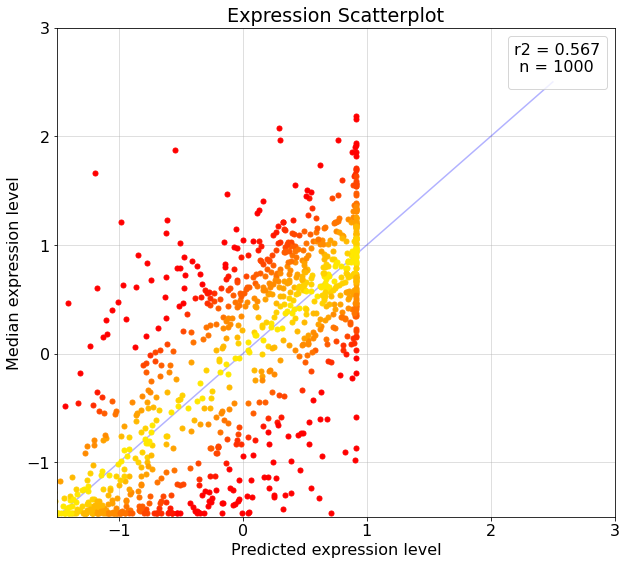

In [ ]:
net.plot_r2([X_testpromoter_p, X_testhalflife], y_test)

In [ ]:
prediction = net.model.predict([X_testpromoter_p, X_testhalflife]).reshape(1000,)

In [ ]:
residuals = y_test - prediction

In [ ]:
from tqdm import tqdm
from scipy import stats
corr = []
for i in tqdm(range(2064)):
  corr.append(stats.pointbiserialr(X_testmicro[:,i], residuals)[0])

100%|██████████| 2064/2064 [00:00<00:00, 11150.32it/s]


In [ ]:
corr = np.array(corr)

In [ ]:
corr = abs(corr)

In [ ]:
corr.argsort()

array([1916,  255, 1421, ...,  954, 1956,   34])

In [ ]:
corr[34]

0.10601253437340515

In [ ]:
import pandas as pd
pd.read_csv('./Dataset/microRNA FINALE/tabelloneCSV.csv').columns[36] #34+2 because the first 2 columns are dummy

'miR-1193'

In [ ]:
import seaborn as sns
sns.set()

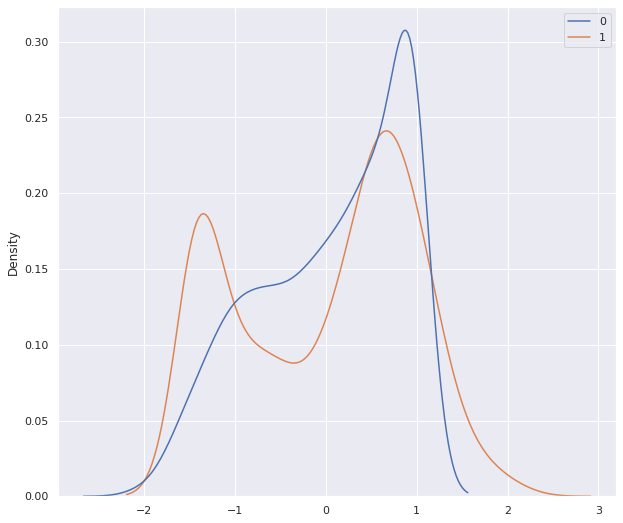

In [ ]:
sns.kdeplot(data=[prediction,y_test])

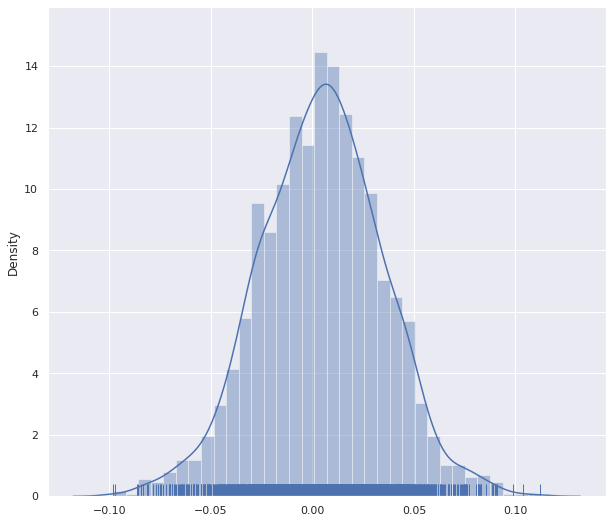

In [ ]:
sns.distplot(x=corr, rug=True)